In [1]:
pip install python-docx

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score


import warnings
warnings.filterwarnings('ignore')

In [23]:
file_paths = []
categories = []
directory = "C:\\Users\\King\\Downloads\\people soft"

for filename in os.listdir(directory):
    if filename.endswith('.docx'):
        file_path = os.path.join(directory, filename)
        file_text = textract.process(file_path).decode('utf-8')
        file_paths.append(file_text)
        categories.append('Peoplesoft')

result_df = pd.DataFrame({'File_Path': file_path, 'Category': categories})


In [6]:
data1 = pd.DataFrame(data = file_paths , columns = ['Raw_Details'])
data1['Category1'] = categories
data1

,Raw_Details,Category1
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft
1,Classification: Internal\n\nClassification: In...,PeopleSoft
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft
4,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft
6,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft


In [14]:
file_path1 = []
categories = []
directory = "C:\\Users\\King\\Desktop\\SQLdeveloper"
for filename in os.listdir(directory):
    if filename.endswith('.docx'):
        file_path = os.path.join(directory, filename)
        file_text = textract.process(file_path).decode('utf-8')
        file_path1.append(file_text)
        categories.append('SQLdeveloper')
result_df = pd.DataFrame({'File_Path': file_path1, 'Category': categories})


In [8]:
data2 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data2['Category2'] = categories
data2

,Raw_Details,Category2
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQLdeveloper
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQLdeveloper
2,BUDDHA VAMSI ...,SQLdeveloper
3,KAMBALLA PRADEEP ...,SQLdeveloper
4,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQLdeveloper
5,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQLdeveloper
6,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQLdeveloper
7,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQLdeveloper
8,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQLdeveloper
9,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQLdeveloper


In [9]:
file_path2 = []
categories = []
directory = "C:\\Users\\King\\Desktop\\workday"
for filename in os.listdir(directory):
    if filename.endswith('.docx'):
        file_path = os.path.join(directory, filename)
        file_text = textract.process(file_path).decode('utf-8')
        file_path2.append(file_text)
        categories.append('workday')
result_df = pd.DataFrame({'File_Path': file_path2, 'Category': categories})

In [10]:
data3 = pd.DataFrame(data = file_path2, columns = ['Raw_Details'])
data3['Category3'] = categories
data3

,Raw_Details,Category3
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday
1,Name : Gopi Krishna Reddy\n\n\t\t ...,workday
2,G Himaja\n\n ...,workday
3,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,workday
4,Mooraboyina Guravaiah\n\nWorkday Integration S...,workday
5,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,workday
6,Workday HCM Techno functional Consultant ...,workday
7,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,workday
8,Srikanth (WORKDAY hCM Consultant)\t ...,workday
9,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday


In [11]:
import os
import textract
import pandas as pd

file_path3 = []
categories = []

directory = "C:\\Users\\King\\Desktop\\jsdeveloper"

for filename in os.listdir(directory):
    if filename.endswith('.docx'):
        file_path = os.path.join(directory, filename)
        file_text = textract.process(file_path).decode('utf-8')
        file_path3.append(file_text)
        categories.append('jsdeveloper')

result_df = pd.DataFrame({'File_Path': file_path3, 'Category': categories})


In [12]:
data4 = pd.DataFrame(data = file_path3, columns = ['Raw_Details'])
data4['Category4'] = categories
data4

,Raw_Details,Category4
0,Name: Ravali P \n\n\n\n ...,jsdeveloper
1,SUSOVAN BAG \n\nSeeking a challenging po...,jsdeveloper
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,jsdeveloper
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,jsdeveloper
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,jsdeveloper
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,jsdeveloper
6,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,jsdeveloper
7,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",jsdeveloper
8,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,jsdeveloper
9,Ui-Developer/ React JS Developer \n\nNAME: KRI...,jsdeveloper


In [ ]:
# Appending all the data1, data2, data3 and having 3 categories.

In [13]:
resume_data = data1.append([ data2, data3,data4], ignore_index = True)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN
1,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft,NaN,NaN,NaN
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN
4,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,NaN,NaN,NaN
6,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,NaN,NaN,NaN
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft,NaN,NaN,NaN
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft,NaN,NaN,NaN
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft,NaN,NaN,NaN


In [14]:
resume_data.shape

(52, 5)

In [15]:
resume_data.dtypes

Raw_Details    object
Category1      object
Category2      object
Category3      object
Category4      object
dtype: object

In [16]:
resume_data['Category'] = resume_data['Category1'].fillna('') + resume_data['Category2'].fillna('') + resume_data['Category3'].fillna('')+resume_data['Category4'].fillna('') 

resume_data.drop(['Category1', 'Category2', 'Category3','Category4'], axis=1, inplace=True)

print(resume_data)

                                          Raw_Details      Category
0   Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...    PeopleSoft
1   Classification: Internal\n\nClassification: In...    PeopleSoft
2   SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...    PeopleSoft
3   PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...    PeopleSoft
4   PeopleSoft Administration\n\n \n\nVivekanand S...    PeopleSoft
5   Hari Narayana \t\t              \n\n\t\n\n\n\n...    PeopleSoft
6   Murali\t\t       \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...    PeopleSoft
7   Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...    PeopleSoft
8   Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...    PeopleSoft
9   C O N T A C T :\n\n\n\nAddress: Manyata Tech P...    PeopleSoft
10  ANIL KUMAR MADDUKURI  \t\t\n\nSQL & MSBI Devel...  SQLdeveloper
11  Aradhana Tripathi\n\n\n\nCurrent Location: Gac...  SQLdeveloper
12  BUDDHA VAMSI                                  ...  SQLdeveloper
13  KAMBALLA PRADEEP                            

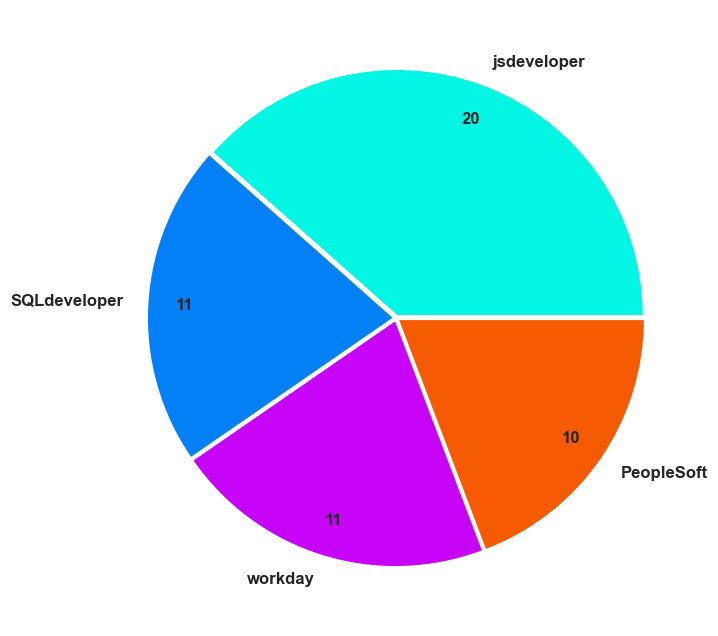

In [17]:
fig = plt.figure(figsize=(8, 8))
sizes = resume_data['Category'].value_counts()
labels = resume_data['Category'].value_counts().index
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03']
explode = (0.01, 0.01, 0.01, 0.01)
plt.pie(sizes, colors=colors, labels=labels, autopct=lambda x: '{:.0f}'.format(x * sizes.sum() / 100),
        pctdistance=0.85, explode=explode, startangle=0, textprops={'size': 'large', 'fontweight': 'bold'})
plt.show()

In [18]:
resume_data.to_csv('Raw_Resume.csv', index=False)

In [19]:
resume_data = pd.read_csv("Raw_Resume.csv")
resume_data

,Raw_Details,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft
1,Classification: Internal\n\nClassification: In...,PeopleSoft
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft
4,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft
6,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft


In [20]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [21]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [22]:
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

# clean Text from Resume

In [23]:
resume_data.drop(['Raw_Details'],axis =1,inplace =True)
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,classification internal classification interna...
2,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
3,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
4,PeopleSoft,peoplesoft administration vivekanand sayana ca...
5,PeopleSoft,hari narayana professional summary years exper...
6,PeopleSoft,murali professional summary years experience p...
7,PeopleSoft,priyabrata hota career objective pursuing peop...
8,PeopleSoft,tanna sujatha objective seeking challenging ro...
9,PeopleSoft,address manyata tech park nagavara bangalore l...


In [24]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [25]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,classification internal classification interna...
2,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
3,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
4,PeopleSoft,peoplesoft administration vivekanand sayana ca...
5,PeopleSoft,hari narayana professional summary years exper...
6,PeopleSoft,murali professional summary years experience p...
7,PeopleSoft,priyabrata hota career objective pursuing peop...
8,PeopleSoft,tanna sujatha objective seeking challenging ro...
9,PeopleSoft,address manyata tech park nagavara bangalore l...


In [26]:
resume_data["Category"].unique()

array(['PeopleSoft', 'SQLdeveloper', 'workday', 'jsdeveloper'],
      dtype=object)

# LabelEncoder

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(resume_data["Category"])
resume_data["Category"]=le.transform(resume_data["Category"])


In [28]:
resume_data["Category"].unique()

array([0, 1, 3, 2])

In [ ]:
#['PeopleSoft'=0 'SQLdeveloper'=1 'workday'=3 'jsdeveloper'=2]
      

# spliting

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x = resume_data['Resume_Details'].values
y = resume_data['Category'].values

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)

# vectorization

In [32]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')
x_train_tfidf = tfidf_vector.fit_transform(x_train)
x_test_tfidf = tfidf_vector.transform(x_test)


In [34]:
x_test_tfidf.shape

(13, 2710)

In [35]:
x_train_tfidf.shape

(39, 2710)

# Model Building

# KNN Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
from sklearn.multiclass import OneVsRestClassifier

In [38]:

knn_classifier = KNeighborsClassifier()

model_knn = OneVsRestClassifier(knn_classifier)

In [39]:

model_knn.fit(x_train_tfidf, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [40]:
y_pred = model_knn.predict(x_test_tfidf)

In [41]:
print(y_pred)

[0 1 0 3 2 2 1 3 2 3 1 2 2]


In [42]:
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train_tfidf, y_train)))

Accuracy of training set : 0.97


In [43]:
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test_tfidf, y_test)))

Accuracy of  test set    : 1.00


In [44]:
cm_knn = confusion_matrix(y_test,y_pred)
print(cm_knn)

[[2 0 0 0]
 [0 3 0 0]
 [0 0 5 0]
 [0 0 0 3]]


In [45]:
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test_tfidf, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13




In [ ]:
#['PeopleSoft'=0 'SQLdeveloper'=1 'workday'=3 'jsdeveloper'=2]

# Decision Tree Classifier

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train_tfidf, y_train)


DecisionTreeClassifier()

In [110]:
y_pred = model_DT.predict(x_test_tfidf)

In [111]:
accuracy_DT = accuracy_score(y_test, y_pred)

In [112]:
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train_tfidf, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test_tfidf, y_test)))

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00


In [113]:
cm_dt = confusion_matrix(y_test,y_pred)
print(cm_dt)

[[2 0 0 0]
 [0 3 0 0]
 [0 0 5 0]
 [0 0 0 3]]


In [ ]:
#This suggests that the model has misclassified one instance of class 2 as class 3., and it did this misclassification one times.

In [114]:
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test_tfidf, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT= round(accuracy_score(y_test,y_pred),2)

Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13




# Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
model_RF = RandomForestClassifier(n_estimators=150)

In [54]:
model_RF.fit(x_train_tfidf, y_train)

RandomForestClassifier(n_estimators=150)

In [55]:
y_pred = model_RF.predict(x_test_tfidf)

In [56]:
accuracy_RF = accuracy_score(y_test, y_pred)

In [57]:
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train_tfidf, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test_tfidf, y_test)))

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00


In [58]:
cm_random = confusion_matrix(y_test,y_pred)
print(cm_random)

[[2 0 0 0]
 [0 3 0 0]
 [0 0 5 0]
 [0 0 0 3]]


In [59]:
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test_tfidf, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF= round(accuracy_score(y_test,y_pred),2)

Classification report for classifier RandomForestClassifier(n_estimators=150):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13




# SVM Classifier

In [60]:
model_svm = SVC()
model_svm.fit(x_train_tfidf, y_train)
y_pred = model_svm.predict(x_test_tfidf)

In [61]:
print(y_pred)

[0 2 0 3 2 2 1 3 2 3 1 2 2]


In [62]:
print(y_test)

[0 1 0 3 2 2 1 3 2 3 1 2 2]


In [63]:
accuracy_SVM = accuracy_score(y_test, y_pred)
print(accuracy_SVM)

0.9230769230769231


In [64]:
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train_tfidf, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test_tfidf, y_test)))

Accuracy of training set : 1.00
Accuracy of  test set    : 0.92


In [65]:
cm_svm = confusion_matrix(y_test,y_pred)
print(cm_svm)

[[2 0 0 0]
 [0 2 1 0]
 [0 0 5 0]
 [0 0 0 3]]


In [66]:
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test_tfidf, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.67      0.80         3
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         3

    accuracy                           0.92        13
   macro avg       0.96      0.92      0.93        13
weighted avg       0.94      0.92      0.92        13




# Logistic Regression

In [67]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train_tfidf, y_train)

LogisticRegression()

In [68]:
y_pred = model_lgr.predict(x_test_tfidf)

In [69]:
accuracy_lgr = accuracy_score(y_test, y_pred)
print(accuracy_lgr)

0.9230769230769231


In [70]:
cm_lg = confusion_matrix(y_test,y_pred)
print(cm_lg)


[[2 0 0 0]
 [0 2 1 0]
 [0 0 5 0]
 [0 0 0 3]]


In [ ]:
# there is no false positive and false negative in this matrix.

In [71]:
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train_tfidf, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test_tfidf, y_test)))

Accuracy of training set : 1.00
Accuracy of  test set    : 0.92


In [72]:
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test_tfidf, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.67      0.80         3
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         3

    accuracy                           0.92        13
   macro avg       0.96      0.92      0.93        13
weighted avg       0.94      0.92      0.92        13




# Bagging Classifier

In [73]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [74]:
model_bagg.fit(x_train_tfidf, y_train)

BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5)

In [75]:
y_pred = model_bagg.predict(x_test_tfidf)

In [76]:
accuracy_bagg = accuracy_score(y_test, y_pred)
print(accuracy_bagg)

0.9230769230769231


In [77]:
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train_tfidf, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test_tfidf, y_test)))

Accuracy of training set : 0.92
Accuracy of  test set    : 0.92


In [78]:
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test_tfidf, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       0.75      1.00      0.86         3

    accuracy                           0.92        13
   macro avg       0.94      0.88      0.88        13
weighted avg       0.94      0.92      0.92        13




# AdaBoost Classifier

In [79]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)

In [80]:
model_Adaboost.fit(x_train_tfidf, y_train)

AdaBoostClassifier(n_estimators=100)

In [81]:
y_pred = model_Adaboost.predict(x_test_tfidf)

In [82]:
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print(accuracy_Adaboost)

1.0


In [83]:
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train_tfidf, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test_tfidf, y_test)))

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00


In [84]:
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test_tfidf, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Classification report for classifier AdaBoostClassifier(n_estimators=100):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13




# Gradient Boosting Classifier

In [85]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train_tfidf, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [86]:
y_pred = model_GradientBoost.predict(x_test_tfidf)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print(accuracy_GradientBoost)

1.0


In [87]:
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train_tfidf, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test_tfidf, y_test)))

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00


In [88]:
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test_tfidf, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_GradientBoost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_GradientBoost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_GradientBoost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_GradientBoost = round(accuracy_score(y_test,y_pred),2)

Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13




# Naive Bayes Classifier

In [89]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)

In [90]:
model_NB.fit(x_train_tfidf, y_train)
y_pred = model_NB.predict(x_test_tfidf)
accuracy_NB = accuracy_score(y_test, y_pred)

In [91]:
print(accuracy_NB)

1.0


In [92]:
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train_tfidf, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test_tfidf, y_test)))

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00


In [93]:
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test_tfidf, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13




In [94]:
from sklearn.model_selection import cross_val_score

In [95]:
scores = cross_val_score(estimator= model_lgr,X =x_train_tfidf,y = y_train,cv =10)
print(scores)

[1.   1.   0.5  0.5  0.75 0.75 0.75 0.75 1.   1.  ]


In [96]:
scores.mean()

0.8

In [97]:
scores.std()

0.18708286933869706

In [98]:
scores = cross_val_score(estimator= model_knn,X =x_train_tfidf,y = y_train,cv =10)
print(scores)

[1.   1.   1.   0.75 1.   1.   0.75 0.75 0.75 1.  ]


In [99]:
scores = cross_val_score(estimator= model_DT,X =x_train_tfidf,y = y_train,cv =10)
print(scores)

[0.75       0.75       0.75       0.75       0.25       0.75
 0.5        1.         1.         0.66666667]


In [100]:
scores = cross_val_score(estimator= model_RF,X =x_train_tfidf,y = y_train,cv =10)
print(scores)

[1.   1.   0.75 1.   1.   1.   1.   0.75 1.   1.  ]


In [101]:
scores = cross_val_score(estimator= model_bagg,X =x_train_tfidf,y = y_train,cv =10)
print(scores)

[1.   1.   1.   0.75 1.   0.75 0.75 1.   1.   1.  ]


In [102]:
scores = cross_val_score(estimator= model_Adaboost,X =x_train_tfidf,y = y_train,cv =10)
print(scores)

[0.75 1.   1.   1.   0.5  1.   0.25 1.   1.   1.  ]


In [103]:
scores = cross_val_score(estimator= model_GradientBoost,X =x_train_tfidf,y = y_train,cv =10)
print(scores)

[1.         1.         1.         1.         0.75       1.
 1.         1.         1.         0.66666667]


In [104]:
scores = cross_val_score(estimator=  model_NB,X =x_train_tfidf,y = y_train,cv =10)
print(scores)

[1.   1.   1.   1.   1.   1.   0.75 1.   1.   1.  ]


In [105]:
scores = cross_val_score(estimator=  model_svm,X =x_train_tfidf,y = y_train,cv =10)
print(scores)

[0.75 0.75 0.5  0.5  0.5  0.75 0.75 0.75 1.   1.  ]


# Model Evaluation

In [115]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(x_train_tfidf, y_train),model_DT.score(x_train_tfidf, y_train),model_RF.score(x_train_tfidf, y_train),model_svm.score(x_train_tfidf, y_train),model_lgr.score(x_train_tfidf, y_train),
                                 model_bagg.score(x_train_tfidf, y_train),model_Adaboost.score(x_train_tfidf, y_train),model_GradientBoost.score(x_train_tfidf, y_train), model_NB.score(x_train_tfidf, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_GradientBoost,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_GradientBoost,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_GradientBoost,f1_NB]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.974359,1.00,1.00,1.00,1.00
1,DecisionTree Classifier,1.000000,1.00,1.00,1.00,1.00
2,RandomForest Classifier,1.000000,1.00,1.00,1.00,1.00
3,SVM Classifier,1.000000,0.92,0.96,0.92,0.93
4,Logistic Regression,1.000000,0.92,0.96,0.92,0.93
5,Bagging Classifier,0.923077,0.92,0.94,0.88,0.88
6,AdaBoost Classifier,1.000000,1.00,1.00,1.00,1.00
7,Gradient Boosting Classifier,1.000000,1.00,1.00,1.00,1.00
8,Naive Bayes Classifier,1.000000,1.00,1.00,1.00,1.00


In [116]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Naive Bayes"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100]
Train_accuracies=[model_knn.score(x_train_tfidf, y_train)*100,model_DT.score(x_train_tfidf, y_train)*100,
                  model_RF.score(x_train_tfidf, y_train)*100,model_svm.score(x_train_tfidf, y_train)*100,
                  model_lgr.score(x_train_tfidf, y_train)*100,model_bagg.score(x_train_tfidf, y_train)*100,
                  model_Adaboost.score(x_train_tfidf, y_train)*100,model_GradientBoost.score(x_train_tfidf, y_train)*100,
                  model_NB.score(x_train_tfidf, y_train)*100]

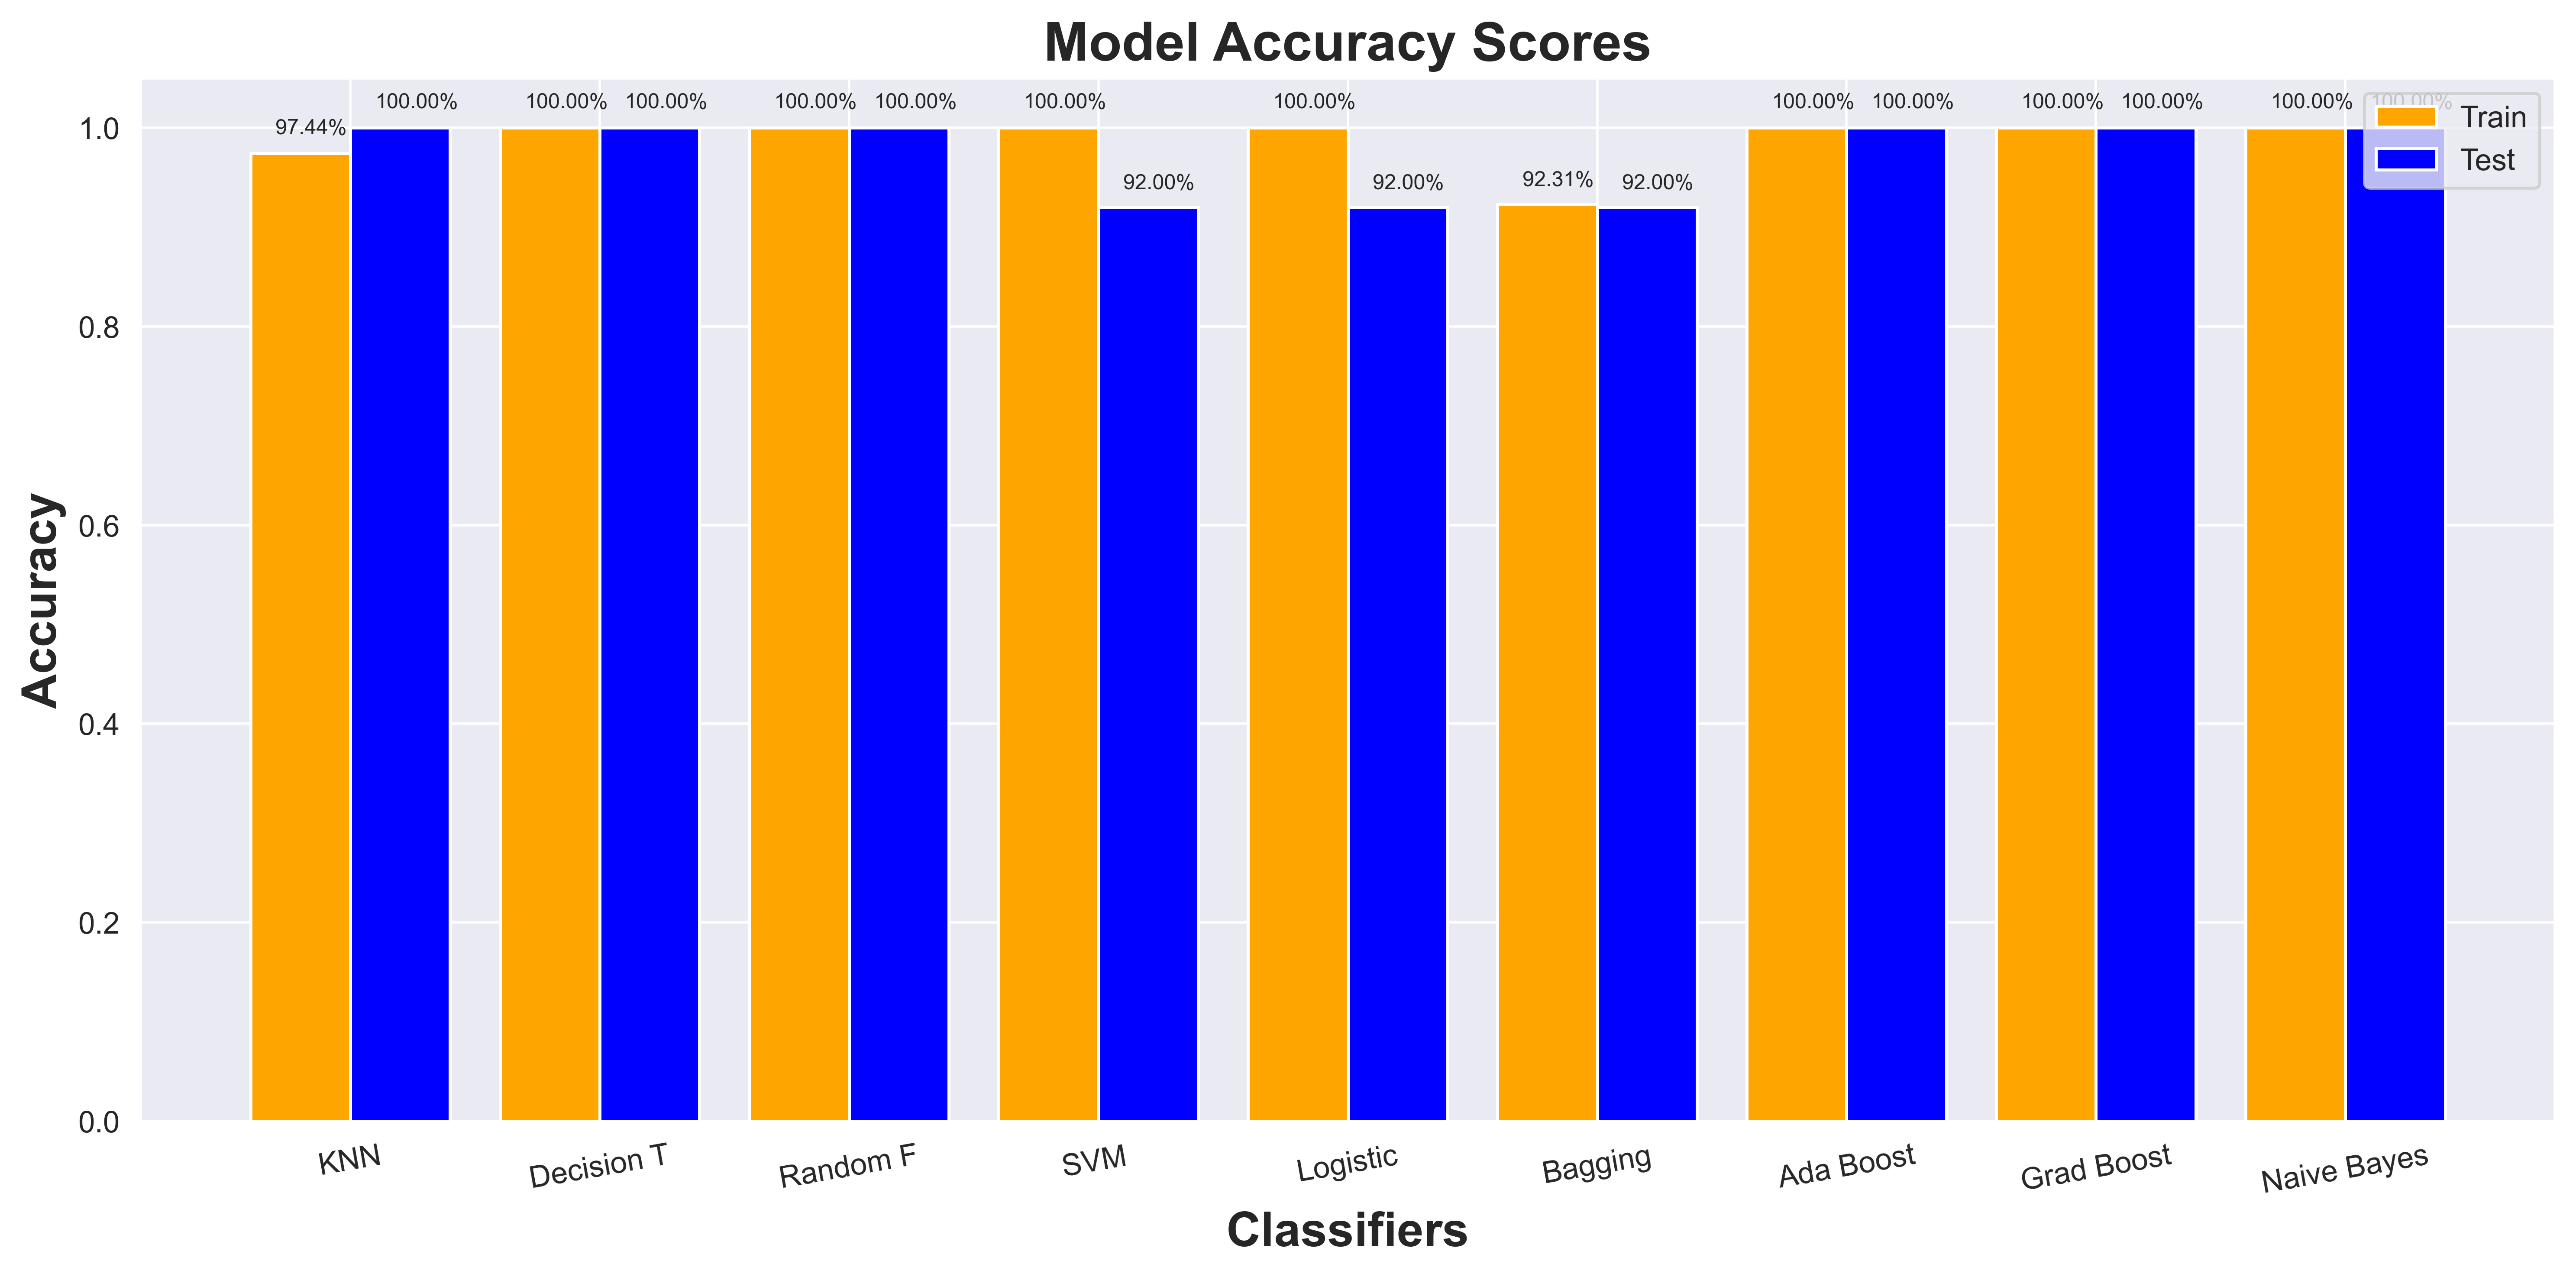

In [117]:
import matplotlib.pyplot as plt
import numpy as np

rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Bagging", "Ada Boost", "Grad Boost","Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)
    
for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()


In [118]:
import pickle

In [138]:
import pickle
directory_path = 'C:\\Users\\King\\Desktop\\'
with open(directory_path + 'model_knn.pickle', 'wb') as file:
    pickle.dump(model_knn, file)


In [139]:
clf = pickle.load(open('model_knn.pickle', 'rb'))

In [140]:
tfidf = pickle.load(open('tfidf_vector.pickle', 'rb'))

In [142]:
with open(directory_path + 'tfidf_vector.pickle', 'wb') as file:
    pickle.dump(tfidf_vector, file)

In [121]:
resume_data["Resume_Details"][0]

'anubhav kumar singh core competencies scripting shell scripting application peoplesoft hcm financials operating system linux windows web app servers weblogic tuxedo rdbms oracle repository github core competencies scripting shell scripting application peoplesoft hcm financials operating system linux windows web app servers weblogic tuxedo rdbms oracle repository github work globally competitive environment challenging assignments shall yield twin benefits job satisfaction steady paced professional growth professional experience current hcl current role system admin offshore skills shell scripting linux peoplesoft administration github managing peoplesoft hcm peoplesoft fscm production environments along support environments installed linux windows involved day day activities project migration database refresh system admin changes tax updates etc troubleshooting various servers like application servers web servers process scheduler servers applying tuxedo weblogic middleware cpu patche